In [106]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
%matplotlib inline
import matplotlib.pyplot as plt

In [107]:
df = pd.read_excel("ActualDataFeb2020.xlsx")

In [108]:
df.columns

Index(['Дата - Время', 'Gpp', 'Tpp', 'Gp4', 'Go4', 'Tp4', 'T04', 'Gp5', 'Go5',
       'Tp5', 'To5', 'Gp2', 'Go2', 'Tp2', 'To2', 'Gpp2', 'Gpb4', 'Gpp7', 'To7',
       'Tp11', 'To11', 'Go11', 'Gp14', 'Go14', 'To14', 'GpSN4', 'GoSN4',
       'TpSN4', 'ToSn4', 'GpSN5', 'GoSN5', 'TpSN5', 'ToSN5', 'GoSN2', 'ToSN2'],
      dtype='object')

### Моделируем 
$
\begin{equation*}
Gp2\;=\;Go2+GoSN2
\end{equation*}
$

In [109]:
#данные для моделирования
cols = ["Gp2","Go2","GoSN2"] 

Склеиваем данные и переводим в более легкий формат

In [110]:
input_data = df[cols].values
input_data = input_data.astype("float32")

Задаем матрицу перехода <br>
Здесь только вручную, либо что-то сложное писать <br>
Для обобщенного можно через lambda

In [111]:
transition_matrices = [[0,1,1],
                       [0,1,0],
                       [0,0,1]]

Инициализируем фильтр Калмана

In [112]:
kf = KalmanFilter(transition_matrices = transition_matrices,
                  observation_matrices = np.eye(3))

С помощью ЕМ алгоритма подбираем параметры распределений скрытых переменных (шумов)

In [113]:
kf = kf.em(input_data)

In [114]:
filtered_data, _ = kf.filter(input_data)

In [115]:
filtered_data

array([[ 481.04359759,  585.36329775,   98.94489679],
       [ 744.61856587,  636.77562026,   92.51597478],
       [ 801.64358795,  706.10565694,   84.708593  ],
       ...,
       [1002.27323271,  896.44679794,  102.14158509],
       [1004.07175935,  905.96793946,   98.64823677],
       [1004.2490183 ,  911.63389275,   93.8546528 ]])

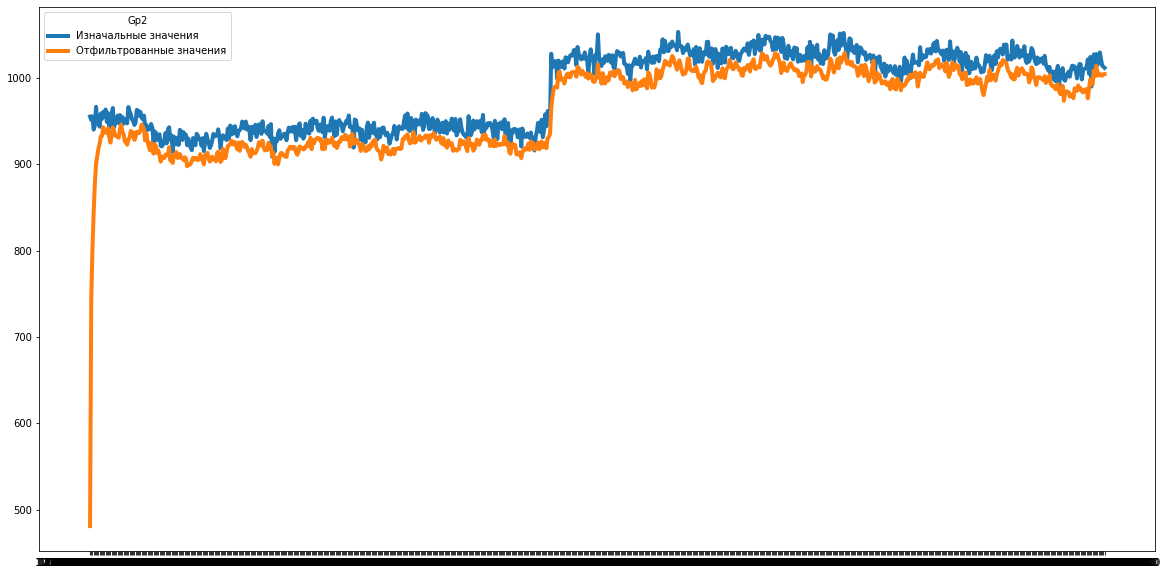

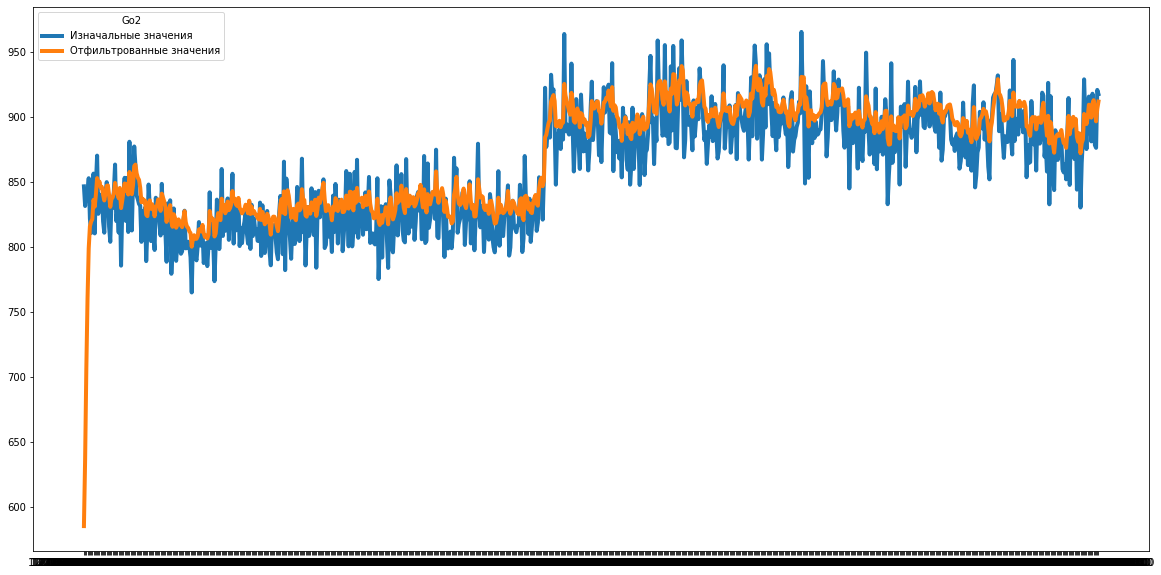

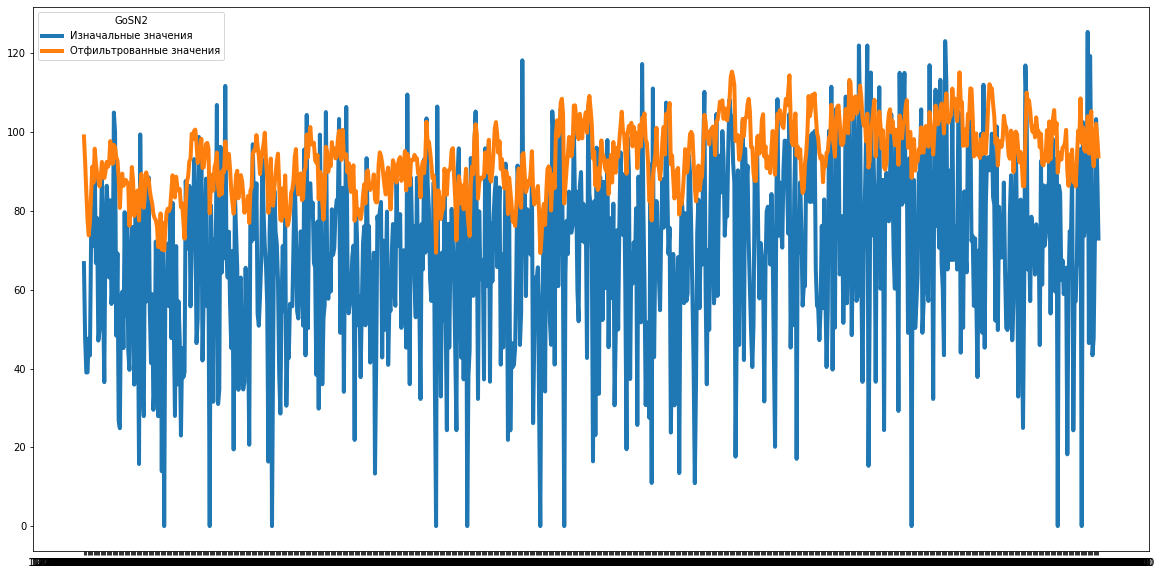

In [116]:
time = df['Дата - Время']


for col_num,col_name in enumerate(cols):
    fig,axes=plt.subplots(1,1)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    
    axes.plot(time,input_data[:,col_num],lw=4, label = 'Изначальные значения')
    axes.plot(time,filtered_data[:,col_num],lw=4, label = 'Отфильтрованные значения')
    axes.legend(title=col_name)


In [117]:
err_input_data = input_data[:,0] - input_data[:,1] - input_data[:,2]

In [118]:
err_filtered_data = filtered_data[:,0] - filtered_data[:,1] - filtered_data[:,2]

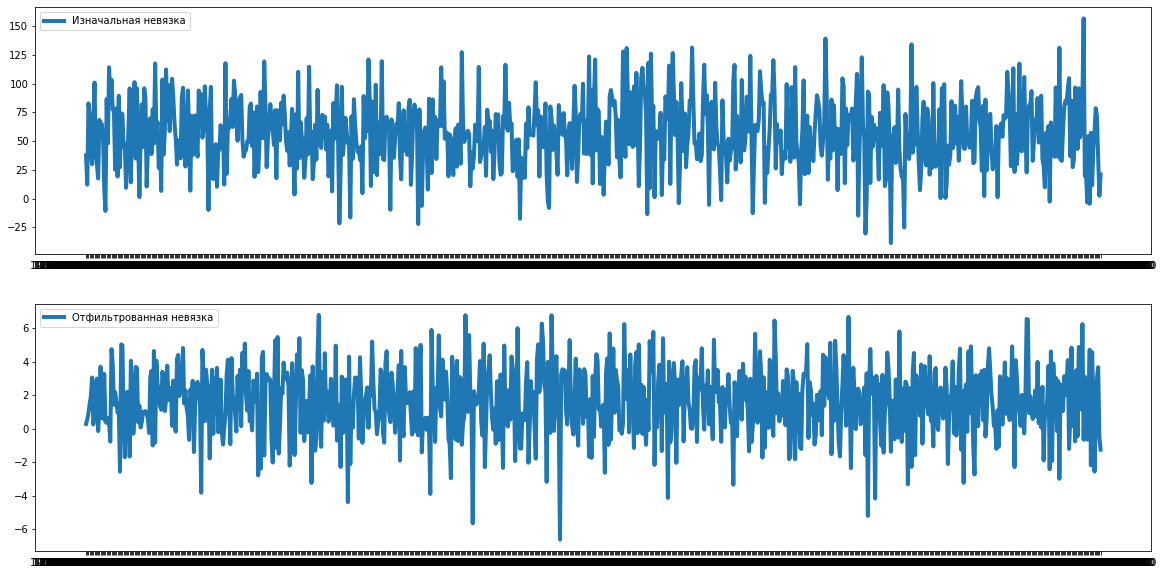

In [119]:
fig,axes=plt.subplots(2,1)
fig.set_figheight(10)
fig.set_figwidth(20)

axes[0].plot(time[10:],err_input_data[10:],lw=4, label = 'Изначальная невязка')
axes[1].plot(time[10:],err_filtered_data[10:],lw=4, label = 'Отфильтрованная невязка')

axes[0].legend()
axes[1].legend()

Подаю два измерения, ибо одно он не глотает <br>(проблема с формами, просто не решилась, так что сложно решил не пытаться делать. Кроме того алгоритм быстрый и имеет смысл много статистики давать и даже на ней EM алгоритм делать)

In [83]:
new_obs = np.array([[1,2,3],[1,2,3]])

In [87]:
kf.filter(new_obs)

(array([[480.37709004, 585.08135182,  98.82980149],
        [510.10957013, 468.4310018 , 100.59036971]]),
 array([[[ 4.95530986e-01,  1.01670889e-03, -1.86573450e-03],
         [ 1.01670889e-03,  3.19497917e-01, -5.57984680e-02],
         [-1.86573450e-03, -5.57984680e-02,  3.14531867e-01]],
 
        [[ 1.33031337e+02,  6.14309551e+01, -2.37648803e+00],
         [ 6.14309551e+01,  1.01308266e+02, -2.04490890e+01],
         [-2.37648803e+00, -2.04490890e+01,  2.79676757e+01]]]))